# <div class="title_h1">Assignment 1 - The Trees of London</div>
### <div class="title_h3">Nic Young</div>

Data is sourced from the [Greater London Authority list of maintained trees](https://data.london.gov.uk/dataset/local-authority-maintained-trees).

Each row represents a single tree planted in the city of London. There are 817,150 total records, but we have cleaned this to leave 227,020. Note that, whilst this dataset ostensibly represents the entire population, we should treat this as a sample due to gaps in the data. The data set was last updated in July 2021.

Available variables:
| variable         | description |
| --------------------------- | ------------|
| `objectid`                  | record identifier. |
| `borough`                   | The borough of London in which the tree resides. |
| `maintainer`                | The entity responsible for maintenance of the tree. |
| `gla_tree_name`             | The display name used for navigating the Greater London Authority tree map. |
| `tree_name`                 | Unsure. This appears to be an uncleaned version of gla_tree_name. |
| `taxon_name`                | Botanical name. This is the most specific identifier of the "same" tree across records. |
| `common_name`               | Common name. |
| `age`                       | This variable is messy and not reliable. See age_group below. |
| `age_group`                 | This classifies each tree as being in a specific age range. Options are: 'Young (0-15)', 'Early mature (16-30)', 'Mature (31-80)', 'Over mature (81-150)', and 'Veteran (over 150)'. Some are undefined. |
| `heigh_m`                   | Height in meters. This variable is sparsely populated and inconsistent in format. |
| `spread_m`                  | Canopy spread in meters. This variable is sparsely populated. |
| `canopy_spread_group`       | This classifies each tree as being in a specific range of canopy spread (in meters). Options are: '00 to 05m', '05 to 10m', '10 to 15m', and '15 to 20m'. Some are undefined. |
| `diameter_at_breast_height` | Diameter at breast height in meters. This variable is sparsely populated. |
| `dbh_group`                 | This classifies each tree as being in a specific range of diameter at breast height (in meters). Options are: '21 to 40cm', '41 to 70cm', '11 to 20cm', 'Upto 10cm', and '70cm+'. This variable is sparsely populated. |
| `longitude`                 | The longitudinal location of the tree. |
| `latitude`                  | The latitudinal location of the tree. |
| `condition`                 | The condition of the tree. Options are: 'Reasonable', 'Good', 'Poor', and 'Dead'. Data only available for Kingston Upon Thames |
| `load_data`                 | The date the tree was first recorded. |
| `updated`                   | The date the tree was last updated. |

## <div class="title_h2">Exploratory analysis</div>

Let's load the data and clean it...

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# load the data
data_file = './data/Borough_tree_list_2021July.csv'
raw = pd.read_csv(data_file)
data = raw[~raw['taxon_name'].str.lower().str.startswith('zz', na=True)].sort_values('taxon_name')

# strip leading and trailing whitespace from age group values
data['age_group'] = data['age_group'].str.strip()

# remove NaN age_group values
data = data[data['age_group'].notna()]

# remove 'Undefined' age_group values
data = data[data['age_group'] != 'Undefined']

# remove 'Out' from boroughs
data = data[data['borough'] != 'Out']

## <div class="title_h2">Let's look at the data</div>

How many of each species is present in each borough?

In [3]:
# group by borough and species as a matrix
species_matrix = data.groupby(['borough', 'taxon_name']).size().unstack(fill_value=0)
species_matrix.head()

taxon_name,Abies,Abies alba,Abies grandis,Abies koreana,Abies lasiocarpa,Abies nordmanniana,Abies procera,Acacia,Acacia dealbata,Acacia melanoxylon,...,Viburnum lantana,Viburnum opulus,Viburnum tinus,Wisteria sinensis,Xanthocyparis nootkatensis,Yucca,Zelkova,Zelkova carpinifolia,Zelkova serrata,Zelkova serrata green vase
borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Barnet,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0
Bexley,0,0,0,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,0
Brent,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Bromley,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0


That's looking a bit sparse. Let's sense check a very common species...

In [4]:
# sycamore and wild cherry
selected_species = ['Acer pseudoplatanus', 'Prunus avium']
print(species_matrix[selected_species])

taxon_name              Acer pseudoplatanus  Prunus avium
borough                                                  
Barking and Dagenham                     85            76
Barnet                                   61           201
Bexley                                   23            84
Brent                                     8            17
Bromley                                  35             2
Camden                                  228           146
City                                      7            11
Croydon                                  29            26
Ealing                                   33            38
Enfield                                  32            18
Greenwich                                13            20
Hackney                                   2            26
Hammersmith and Fulham                    0             0
Haringey                                 15            15
Havering                                 27            46
Hillingdon    

Okay that's good.

Let's try to visualise diversity across boroughs. It's going to be a big plot...

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(450, 15))

sb.heatmap(species_matrix, cmap='YlGnBu', linewidths=.2)

plt.title('Distribution of Tree Species Across London Boroughs', fontsize=8)
plt.xlabel('Species')
plt.ylabel('Borough')

plt.show()

Okay that's a bit extreme. We have a few outliers and an otherwise fairly even distribution. It's also just way too much information. So it doesn't tell us much.

Let's try to reduce each borough to a value representing its diversity. Starting simple, we'll just count the number of unique species in each borough and plot that on a bar chart.

In [6]:
# group by borough and species
species_count = data.groupby('borough')['taxon_name'].nunique()
print(species_count)

borough
Barking and Dagenham      110
Barnet                     61
Bexley                     32
Brent                      24
Bromley                    44
Camden                    184
City                      129
Croydon                    36
Ealing                     45
Enfield                    44
Greenwich                  44
Hackney                    29
Hammersmith and Fulham     19
Haringey                   35
Havering                   43
Hillingdon                171
Hounslow                   55
Islington                  31
Kensington and Chelsea     37
Kingston upon Thames      274
Lambeth                    40
Lewisham                  159
Merton                     29
Newham                    141
Redbridge                 274
Richmond                   39
Southwark                 274
Sutton                     37
Tower Hamlets             105
Waltham Forest             20
Wandsworth                 42
Westminster                30
Name: taxon_name, dtype: int64


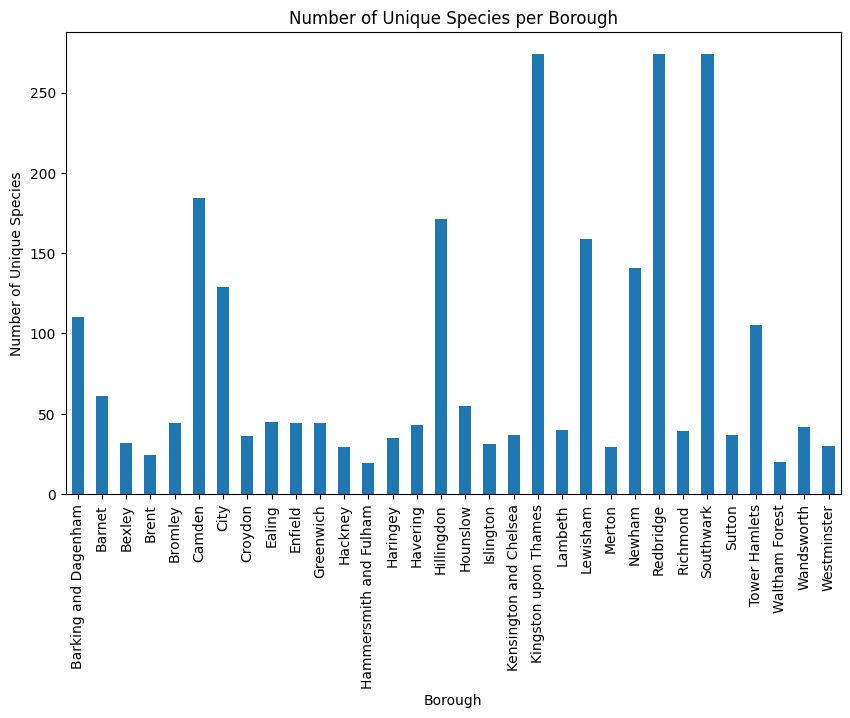

In [7]:
# bar chart
species_count.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Unique Species per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Unique Species')

plt.show()

How is that distributed?

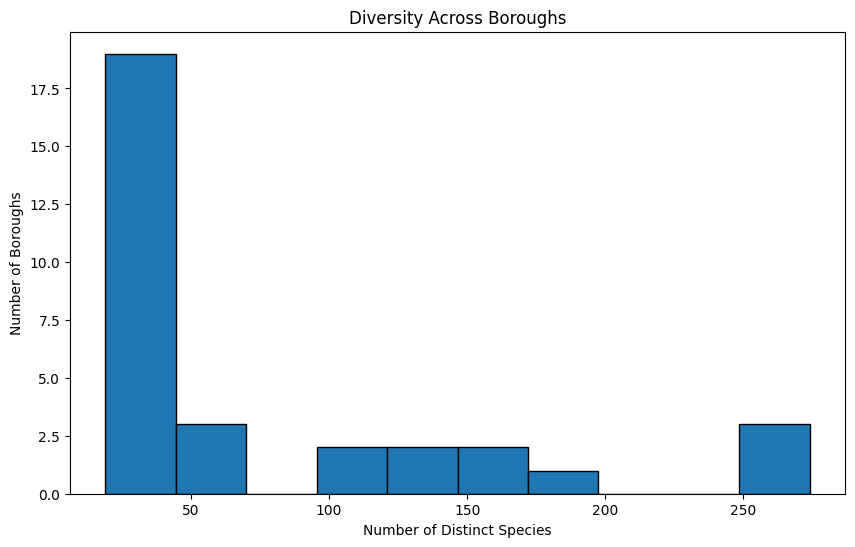

In [8]:
# histogram of the number of species per borough
plt.figure(figsize=(10, 6))
plt.hist(species_count, bins=10, edgecolor='black')

plt.title('Diversity Across Boroughs')
plt.xlabel('Number of Distinct Species')
plt.ylabel('Number of Boroughs')

plt.show()

What if we inverted that?

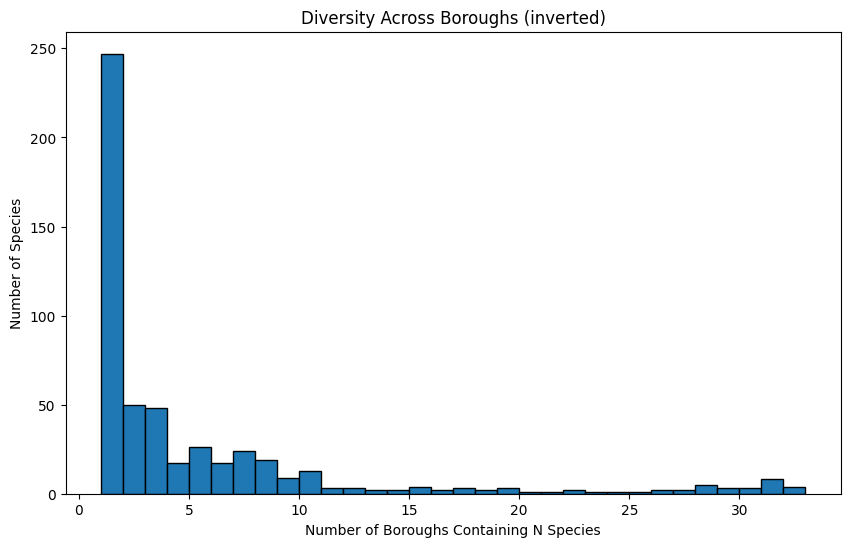

In [9]:
# count the number of boroughs each species is found in
species_per_borough_count = data.groupby('taxon_name')['borough'].nunique()

# histogram showing the number of species by number of boroughs
plt.figure(figsize=(10, 6))
plt.hist(species_per_borough_count, bins=range(1, species_per_borough_count.max() + 2), edgecolor='black')

plt.title('Diversity Across Boroughs (inverted)')
plt.xlabel('Number of Boroughs Containing N Species')
plt.ylabel('Number of Species')

plt.show()

Okay what about sheer number of trees?

In [10]:
# count the records per borough
tree_count = data.groupby('borough').size()
print(tree_count)

borough
Barking and Dagenham       4574
Barnet                     2250
Bexley                      471
Brent                       259
Bromley                     672
Camden                     5801
City                       1544
Croydon                     954
Ealing                      941
Enfield                    1262
Greenwich                   941
Hackney                     427
Hammersmith and Fulham      161
Haringey                    512
Havering                   1717
Hillingdon                20598
Hounslow                   2586
Islington                   506
Kensington and Chelsea      787
Kingston upon Thames      18702
Lambeth                     879
Lewisham                  32628
Merton                      516
Newham                    22230
Redbridge                 39996
Richmond                    991
Southwark                 55375
Sutton                     1070
Tower Hamlets              5552
Waltham Forest              493
Wandsworth                  704


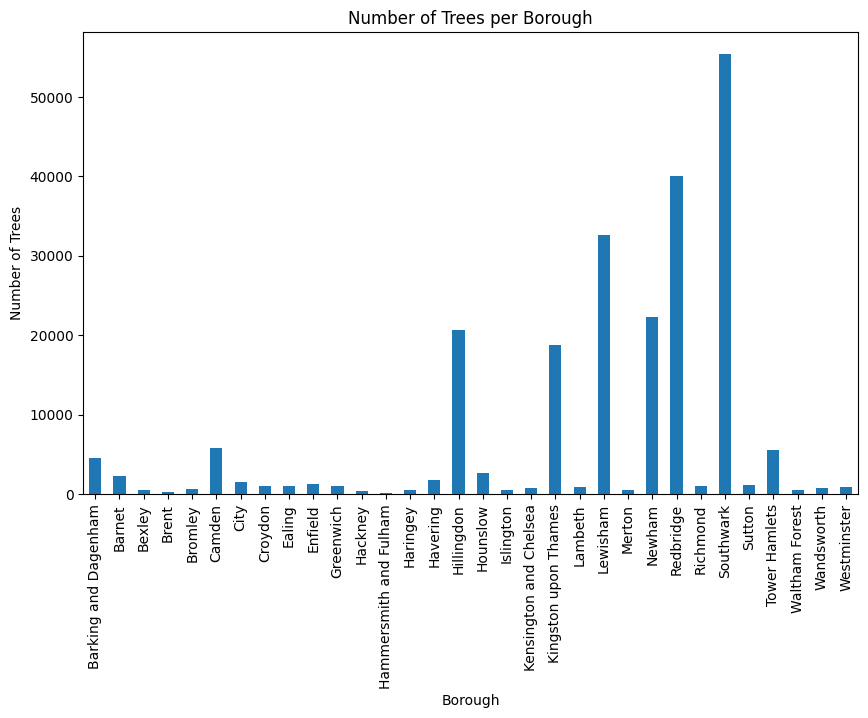

In [11]:
# bar chart
tree_count.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Trees per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trees')

plt.show()

Okay the number of distinct species is obviously skewed by the variance in sheer number of trees. What if we ascribe a simple, relative diversity score to normalise for totals?

In [12]:
# unique species / log(total trees)
relative_diversity = species_count / np.log(tree_count)
print(relative_diversity)

borough
Barking and Dagenham      13.051510
Barnet                     7.902900
Bexley                     5.199145
Brent                      4.319011
Bromley                    6.758564
Camden                    21.232928
City                      17.569829
Croydon                    5.247306
Ealing                     6.572276
Enfield                    6.162074
Greenwich                  6.426225
Hackney                    4.788020
Hammersmith and Fulham     3.739124
Haringey                   5.610481
Havering                   5.773103
Hillingdon                17.215431
Hounslow                   6.999354
Islington                  4.978691
Kensington and Chelsea     5.548700
Kingston upon Thames      27.855760
Lambeth                    5.900763
Lewisham                  15.298868
Merton                     4.642892
Newham                    14.087043
Redbridge                 25.857510
Richmond                   5.653227
Southwark                 25.087248
Sutton              

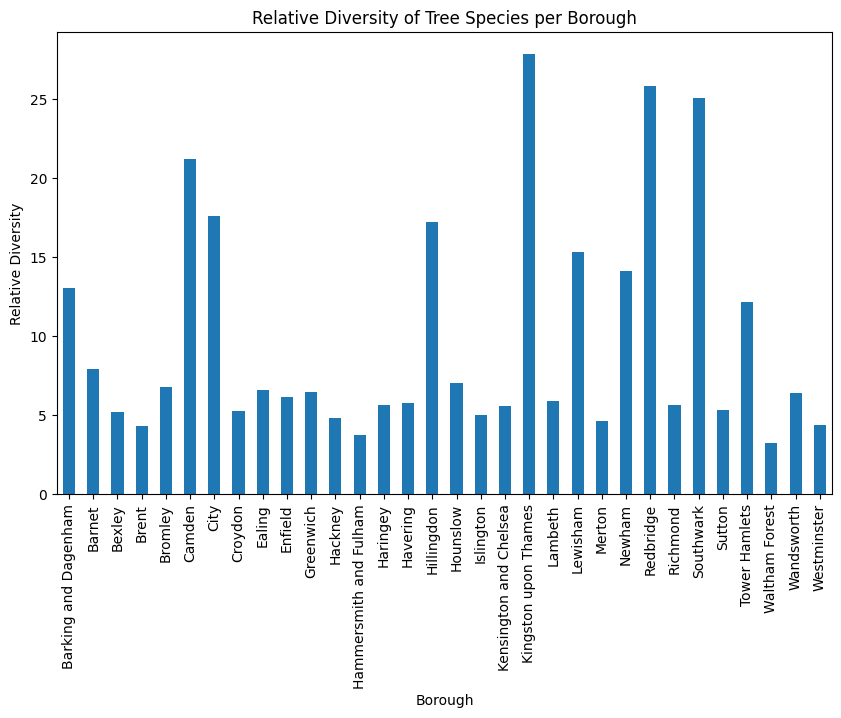

In [13]:
# bar chart
relative_diversity.plot(kind='bar', figsize=(10, 6))

plt.title('Relative Diversity of Tree Species per Borough')
plt.xlabel('Borough')
plt.ylabel('Relative Diversity')

plt.show()

Okay that's more interesting.

Now let's look at a different facet of the data: age groups. We'll show the percentage of each age group per borough as a 100% stacked bar chart...

In [14]:
# number of trees in a given age group by borough, as matrix
age_group_count = data.groupby(['borough', 'age_group']).size().unstack(fill_value=0)
print(age_group_count)

age_group               Early mature (16-30)  Mature (31-80)  \
borough                                                        
Barking and Dagenham                      61             757   
Barnet                                   789             498   
Bexley                                   285             168   
Brent                                     32              18   
Bromley                                  265             362   
Camden                                   118            2506   
City                                     497             586   
Croydon                                  310             507   
Ealing                                   272              92   
Enfield                                  267             221   
Greenwich                                426             358   
Hackney                                  186             114   
Hammersmith and Fulham                    37              52   
Haringey                                

In [15]:
# normalize by total trees in each borough to get percentages
age_group_percentages = age_group_count.div(age_group_count.sum(axis=1), axis=0) * 100

# reorder columns
age_group_order = ['Young (0-15)', 'Early mature (16-30)', 'Mature (31-80)', 'Over mature (81-150)', 'Veteran (over 150)']
age_group_percentages = age_group_percentages[age_group_order]

print(age_group_percentages)

age_group               Young (0-15)  Early mature (16-30)  Mature (31-80)  \
borough                                                                      
Barking and Dagenham       81.635330              1.333625       16.550066   
Barnet                     42.400000             35.066667       22.133333   
Bexley                      3.609342             60.509554       35.668790   
Brent                      80.694981             12.355212        6.949807   
Bromley                     5.654762             39.434524       53.869048   
Camden                     23.409757              2.034132       43.199448   
City                       29.857513             32.189119       37.953368   
Croydon                    14.360587             32.494759       53.144654   
Ealing                     60.892667             28.905420        9.776833   
Enfield                    61.331220             21.156894       17.511886   
Greenwich                  16.259299             45.270988      

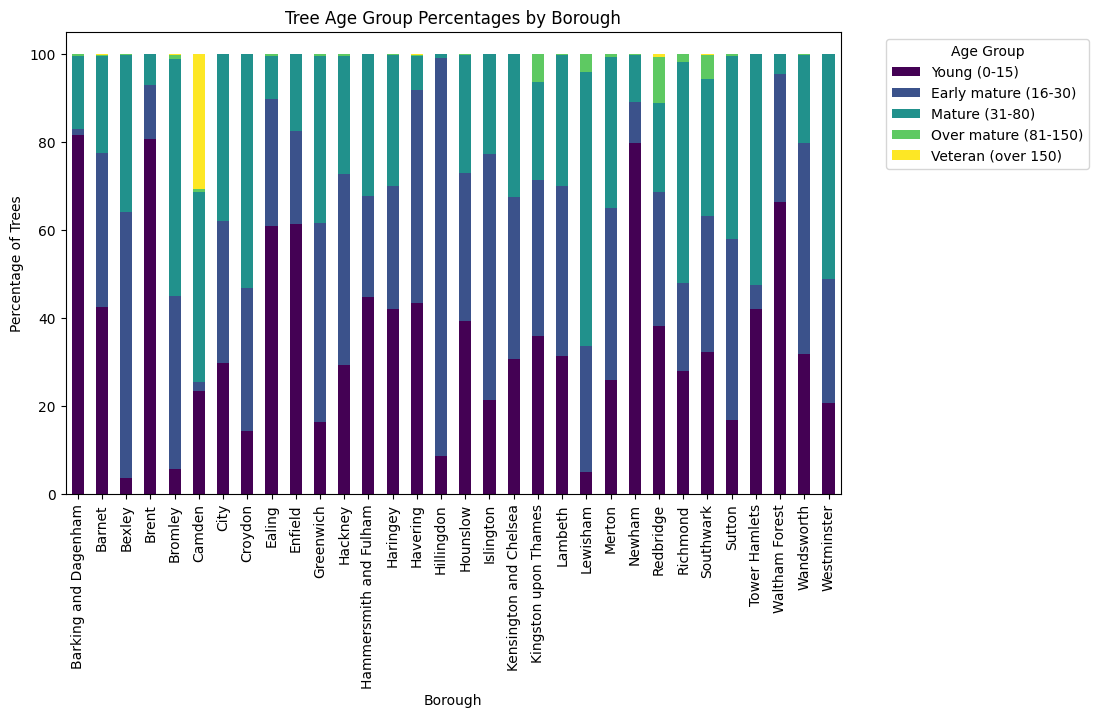

In [16]:
# 100% stacked bar chart
age_group_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Tree Age Group Percentages by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage of Trees')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

We have some interesting data in Kingston Upon Thames that is not available for other boroughs. Let's look at that too...

First up: tree condition...

In [17]:
# filter for rows that have the condition property, group by borough and condition, and count
condition_count = data[['borough', 'condition']].groupby(['borough', 'condition']).size()
print(condition_count)

borough               condition 
Kingston upon Thames  Dead            333
                      Good           1974
                      Poor            641
                      Reasonable    15227
dtype: int64


A pie chart should suffice here...

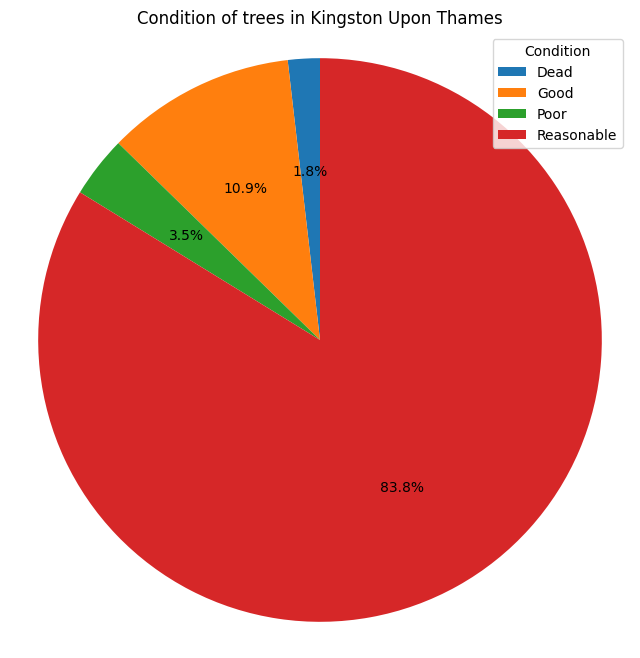

In [18]:
# pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(condition_count, autopct='%1.1f%%', startangle=90)

plt.legend(wedges, [c for b, c in condition_count.index], title="Condition")
plt.title('Condition of trees in Kingston Upon Thames')
plt.axis('equal')

plt.show()

Next up: canopy spread group...

In [19]:
# filter for rows that have a canopy spread group, group by borough and canopy spread group, and count
canopy_spread_count = data[['borough', 'canopy_spread_group']].groupby(['borough', 'canopy_spread_group']).size()
print(canopy_spread_count)

borough               canopy_spread_group
Kingston upon Thames  00 to 05m              11537
                      05 to 10m               5847
                      10 to 15m                740
                      15 to 20m                 51
dtype: int64


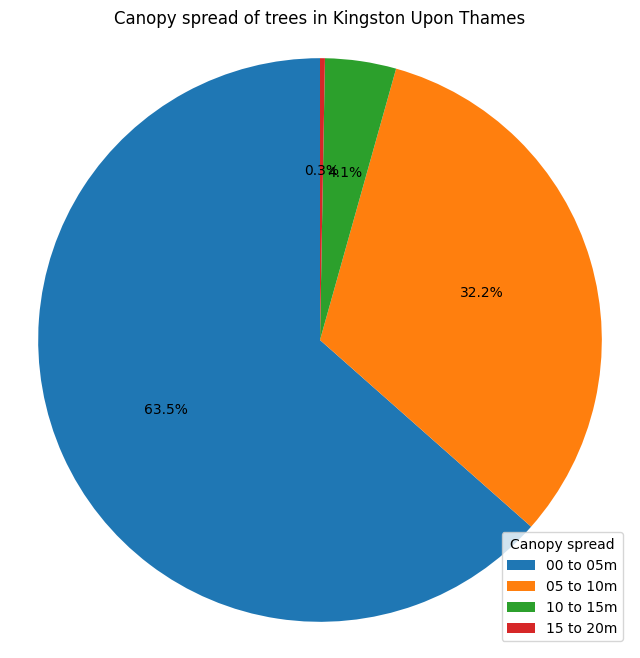

In [20]:
# pie chart again
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(canopy_spread_count, autopct='%1.1f%%', startangle=90)

plt.legend(wedges, [c for b, c in canopy_spread_count.index], title="Canopy spread")
plt.title('Canopy spread of trees in Kingston Upon Thames')
plt.axis('equal')

plt.show()

Let's see this broken down by age...

In [21]:
# group by age group and canopy spread group, in a matrix
canopy_spread_by_age_count = data.groupby(['age_group', 'canopy_spread_group']).size().unstack(fill_value=0)
print(canopy_spread_by_age_count)

canopy_spread_group   00 to 05m  05 to 10m  10 to 15m  15 to 20m
age_group                                                       
Early mature (16-30)       4174       2227         17          1
Mature (31-80)              740       2919        264          0
Over mature (81-150)         84        629        437         50
Young (0-15)               6539         72         22          0


In [22]:

# normalize by total trees in each age group to get percentages
canopy_spread_group_percentages = canopy_spread_by_age_count.div(canopy_spread_by_age_count.sum(axis=1), axis=0) * 100

# reorder the bar stacks to be incremental
canopy_spread_group_order = ['00 to 05m', '05 to 10m', '10 to 15m', '15 to 20m']
canopy_spread_group_percentages = canopy_spread_group_percentages[canopy_spread_group_order]

# reorder the columns to be incremental
age_group_order = ['Young (0-15)', 'Early mature (16-30)', 'Mature (31-80)', 'Over mature (81-150)']
canopy_spread_group_percentages = canopy_spread_group_percentages.reindex(age_group_order)

print(canopy_spread_group_percentages)

canopy_spread_group   00 to 05m  05 to 10m  10 to 15m  15 to 20m
age_group                                                       
Young (0-15)          98.582843   1.085482   0.331675   0.000000
Early mature (16-30)  65.025705  34.693878   0.264839   0.015579
Mature (31-80)        18.863115  74.407341   6.729544   0.000000
Over mature (81-150)   7.000000  52.416667  36.416667   4.166667


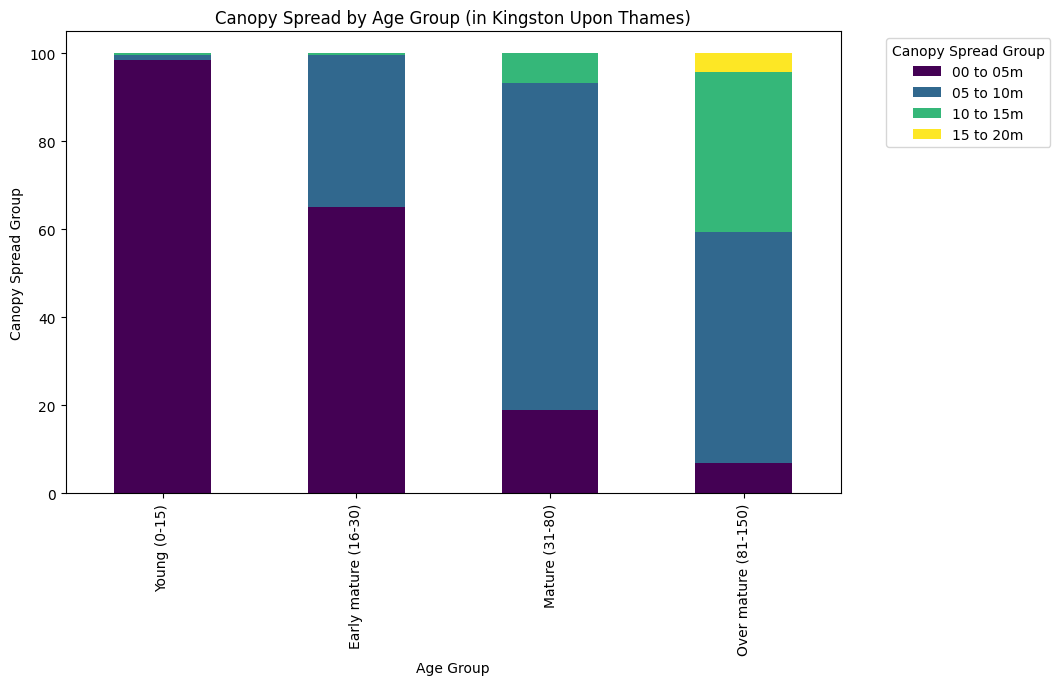

In [23]:
# 100% stacked bar chart
canopy_spread_group_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Canopy Spread by Age Group (in Kingston Upon Thames)')
plt.xlabel('Age Group')
plt.ylabel('Canopy Spread Group')
plt.legend(title='Canopy Spread Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This checks out I guess. Older == bigger :D

I think I'll stop here. Next up for assignment 2 will be to interrogate how well this sample represents the population, whether we can form any hypotheses, and whether we can verify them if so.